#### 2023-2 DSL 정규세션 과제
##### ML/DL을 위한 수학 1, 2
 - 작성자 : 서연우, 김서진
 - 과제 제출 기한 : 2023.07.22 (토) 11:59
 ---

- 이름 : 윤형진
- 기수 : 10기

##### Q1. 아래 행렬 A를 보고 물음에 답하세요. (과정은 수기로 작성 후 pdf로 업로드해주세요.)

In [1]:
import numpy as np

A = np.array([[1, 0, 1],
              [0, 2, 3],
              [0, 0, 3]])

print(A)

[[1 0 1]
 [0 2 3]
 [0 0 3]]


(1) 다음 행렬의 determinant를 구하고, 기하학적으로 어떤 의미를 갖는지 서술하시오.

|A| = 1*(2*3 - 3*0) - 0*(0*3 - 3*0) + 1(0*0 - 2*0)
    = 6
<br> <br/>
기하학적 의미 : 해당 행렬을 이용하여 선형변환을 했을 때, unit vector로서 표현되는 단위공간(2차원이라면 1x1 평면, 3차원이라면 1x1x1 큐브)이 선형변환 후 가지는 크기

(2) A의 eigenvalue, eigenvector를 각각 찾고 각각의 의미를 서술하시오.

In [2]:
A = np.array([[1, 0, 1],
              [0, 2, 3],
              [0, 0, 3]])
l = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
det = np.linalg.det(A - l)


eigen value = 1, 2, 3
<br><br/>
----------------------의미------------------

##### Q2. Matrix B 에 대해 diagonalization을 시행하고 그 과정을 서술하시오.

In [2]:
B = np.array([[0, 0, 0],
              [0, 0, 0],
              [3, 0, 1]])

print(B)

[[0 0 0]
 [0 0 0]
 [3 0 1]]


##### Q3. 아래 문제를 읽고 해결하시오.
메일 시스템에서 스팸 필터링을 담당하는 베이즈 필터가 있습니다. 이 필터는 메일이 스팸일 확률을 계산하기 위해 베이즈 정리를 사용합니다. 베이즈 필터는 다음의 약률을 알고 있습니다:
- 메일 시스템에 도착하는 메일 중 스팸 메일의 비율(p(Spam))은 20%입니다.
- 스팸 메일 중에서 '당첨'이라는 단어를 포항하는 비율(P('당첨' | Spam))은 50% 입니다.
- 스팸이 아닌 정상 메일 중에서 '당첨'이라는 단어를 포함하는 비율(P('당첨' | Not Spam))은 1%입니다.

어느 날, 메일 시스템에 '당첨'이라는 단어를 포함하는 메일이 도착했습니다. 이 메일이 스팸일 확률을 베이즈 정리를 이용하여 계산하십시오

##### Q4. 야구 경기에서 타자가 스윙을 치는 경우, 그 결과는 안타와 아웃 두가지 중 하나가 될 수 있습니다. (홈런도 안타로 간주합니다.) 이 때, 타자의 스윙 결과를 예측하는 모델을 만들고자 이전 타자들의 기록을 수집했습니다. 그 결과는 hit.csv의 결과와 같습니다. 아래 3문제를 hit.csv의 결과를 바탕으로 해결해주세요. (계산 결과는 소수점 셋째자리까지 반올림하여 표현해주세요.)


(1) 스윙 결과의 분포는 어떤 분포의 일종입니다. 이 분포가 어떤 분포인지 말하고, 해당 분포의 엔트로피를 코드로 작성해 계산하여 그 값을 plot으로 그려주세요. 
###간단하게, 앞면과 뒷면이 나올 확률이 같은 동전을 던졌을 때, 앞면이 나올 확률에 대한 엔트로피를 plot으로 그려주세요.

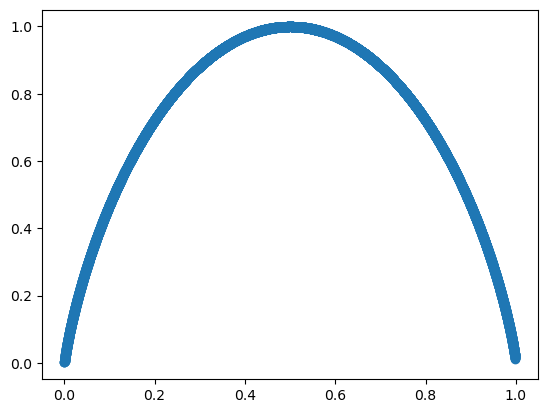

In [38]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

func = lambda p: - p * np.log2( p ) - (1-p) * np.log2(1-p)
y_list = []
for x in np.arange(0.0001, 1.0 - 0.001, 0.0001):
    y = func(x)
    y_list.append(y)

plt.scatter(list(np.arange(0.0001, 1.0 - 0.001, 0.0001)), y_list)

(2) hit.csv의 엔트로피를 코드를 사용하지 말고 손으로 계산하세요.(과정은 수기로 작성 후 pdf로 업로드해주세요.)

In [3]:
import pandas as pd
# 디렉토리 설정하여 데이터 로드
hit = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:11] 머신러닝:딥러닝을 위한 수학/[230715]_assignment_Math_for_MLDL/hit.csv', index_col=0)
hit

,스윙 결과
타자,
1,Hit
2,Hit
3,Out
4,Hit
5,Out
6,Hit
7,Hit
8,Out
9,Out


0.6 0.4
0.9709505944546686


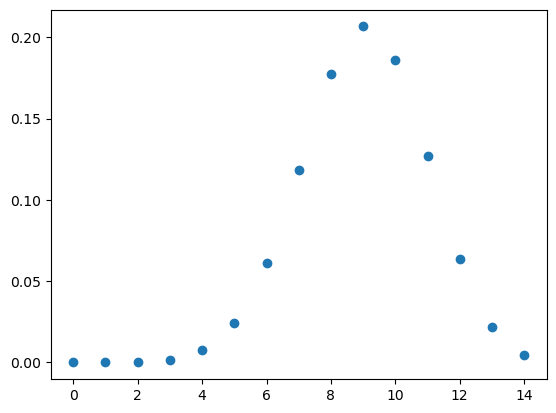

In [49]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from math import comb

p = len(hit.loc[hit["스윙 결과"] == "Hit"]) / len(hit)
q = 1-p
print(p,q)

entropy = func(p)
print(entropy)


y_list = []
for n in range(0,15):
    prob = comb(15, n) * (p ** n) * (q ** (15-n)) 
    y_list.append(prob)

plt.scatter(list(range(0,15)), y_list)

(3) 계산하던 중, 다른 팀의 타자 기록을 얻게 되었습니다. 이 기록을 hit_other.csv에 저장해두었습니다. 첫번째 팀에 대해, 첫번째 팀과 두번째 팀의 스윙 결과 데이터 분포의 차이를 손으로 계산하세요. (과정은 수기로 작성 후 pdf로 업로드해주세요.)

In [4]:
# 디렉토리 설정하여 데이터 로드
hit_other = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:11] 머신러닝:딥러닝을 위한 수학/[230715]_assignment_Math_for_MLDL/hit_other.csv', index_col=0)
hit_other

,스윙 결과
타자,
1,Out
2,Hit
3,Out
4,Out
5,Out
6,Hit
7,Hit
8,Out
9,Out


0.26666666666666666 0.7333333333333334
0.8366407419411672


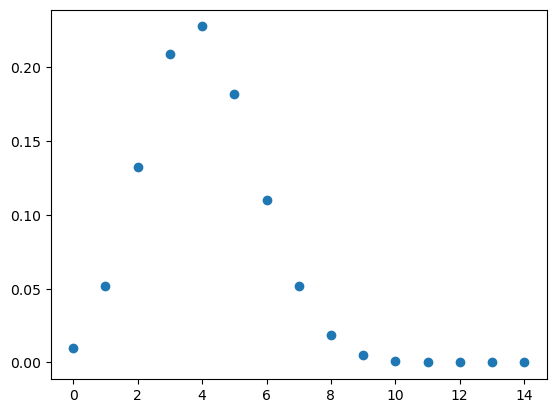

In [48]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from math import comb


p = len(hit_other.loc[hit_other["스윙 결과"] == "Hit"]) / len(hit_other)
q = 1-p
print(p,q)

entropy = func(p)
print(entropy)


y_list = []
for n in range(0,15):
    prob = comb(15, n) * (p ** n) * (q ** (15-n)) 
    y_list.append(prob)

plt.scatter(list(range(0,15)), y_list)

In [55]:
kl = 0.6 * np.log2(0.6/(4/15)) + 0.4 * np.log2(0.4/(11/15))
kl

0.35216735369893104

##### Q5. Logistic Regression의 Convex optimization 과정을 서술해주세요. (과정은 수기로 작성 후 pdf로 업로드해주세요.)